In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
from scipy import signal
import sklearn.metrics
from sklearn.metrics import confusion_matrix
import seaborn as sb

In [3]:
person_numlist = list(range(1, 68))
trials = list(range(1, 4))


In [35]:
# Loading ADLs (loading 5 times more adl data then fall, according to proportions)
# Taking 7 adls and 4 falls
# adl_types tells number of windows to extract from each data file

fall_types = ['FOL', 'FKL', 'BSC', 'SDL']
adl_types = {
    'STD':1,
    'WAL':1,
    'JOG':3,
    'JUM':3,
    'STU':6,
    'STN':6,
    'SIT':1
}

reading from  /kaggle/input/mobiact/MobiAct_Dataset_v2.0/Annotated Data/STU===================================================================================================
Time taken :-  1.0999000072479248


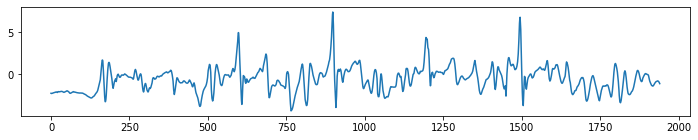

reading from  /kaggle/input/mobiact/MobiAct_Dataset_v2.0/Annotated Data/STN===================================================================================================
Time taken :-  1.272946834564209


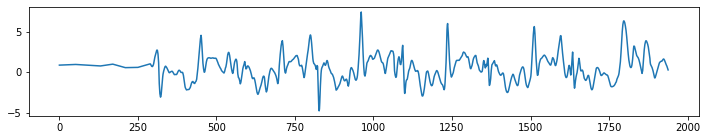

reading from  /kaggle/input/mobiact/MobiAct_Dataset_v2.0/Annotated Data/WAL===================================================================================================
Time taken :-  5.347128868103027


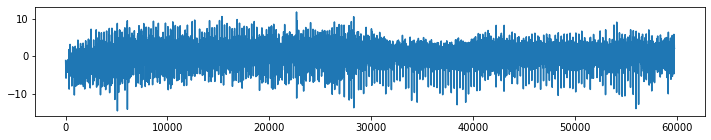

reading from  /kaggle/input/mobiact/MobiAct_Dataset_v2.0/Annotated Data/SIT===================================================================================================
Time taken :-  0.41566967964172363


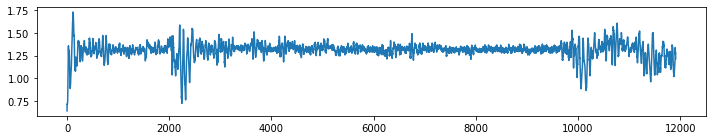

reading from  /kaggle/input/mobiact/MobiAct_Dataset_v2.0/Annotated Data/JUM===================================================================================================
Time taken :-  1.947378158569336


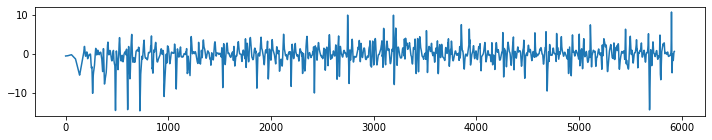

reading from  /kaggle/input/mobiact/MobiAct_Dataset_v2.0/Annotated Data/STD===================================================================================================
Time taken :-  5.494320392608643


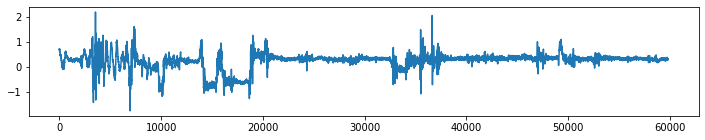

reading from  /kaggle/input/mobiact/MobiAct_Dataset_v2.0/Annotated Data/JOG===================================================================================================
Time taken :-  2.2784225940704346


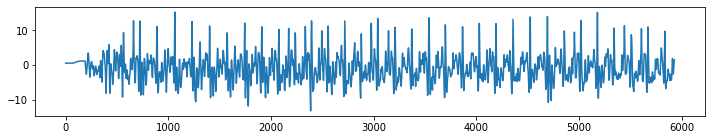

Time taken ==  17.855766534805298


In [36]:
xtrain = []
ytrain = []

total_time = 0

for folder in os.listdir('/input/mobiact/MobiAct_Dataset_v2.0/Annotated Data'):
    if folder not in adl_types : continue
    t1 = time.time()
    
    visualize = 1
    
    path = '/mobiact/MobiAct_Dataset_v2.0/Annotated Data/' + folder
    print('reading from ',path,end = '')
    for person in person_numlist:
        for trial in trials:
            try :
                data = pd.read_csv(path + '/' + folder + '_' + str(person) + '_' + str(trial) + '_' + 'annotated.csv')

                acc_x = np.array(data['acc_x']).reshape((len(data),1))
                acc_y = np.array(data['acc_y']).reshape((len(data),1))
                acc_z = np.array(data['acc_z']).reshape((len(data),1))
                gyro_x = np.array(data['gyro_x']).reshape((len(data),1))
                gyro_y = np.array(data['gyro_y']).reshape((len(data),1))
                gyro_z = np.array(data['gyro_z']).reshape((len(data),1))

                data = np.concatenate([acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z],axis = -1)

                num_windows = (15+adl_types[folder])/adl_types[folder]
                for last_point in range(600,len(acc_x)+1,300):
                    num_windows -= 1
                    xtrain.append(data[last_point-600:last_point])
                    ytrain.append(0)
                    if num_windows == 0 : break
                        
                if visualize == 1:
                    plt.figure(figsize = (12,2))
                    plt.plot(acc_x)
                    visualize = 0
                    print('================================')
            except : continue

    activity += 1
    t2 = time.time()
    total_time += t2 - t1
    print('Time taken :- ' , t2 - t1)
    plt.show()
print('Time taken == ',total_time)

FOL data :- 


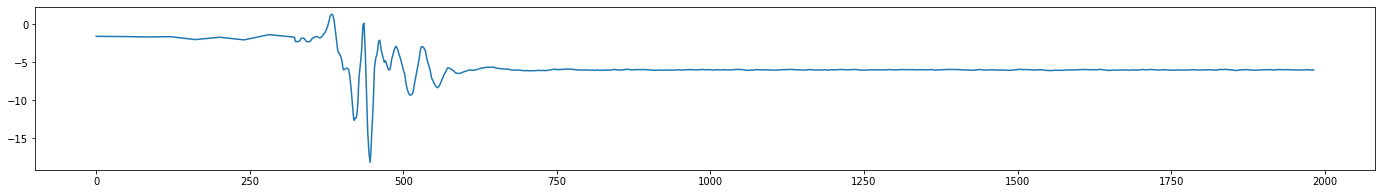

FKL data :- 


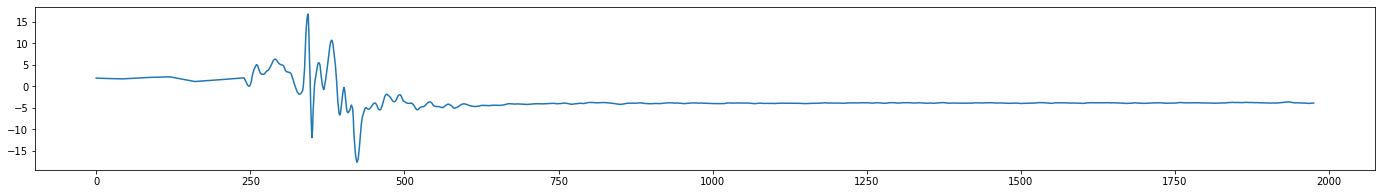

BSC data :- 


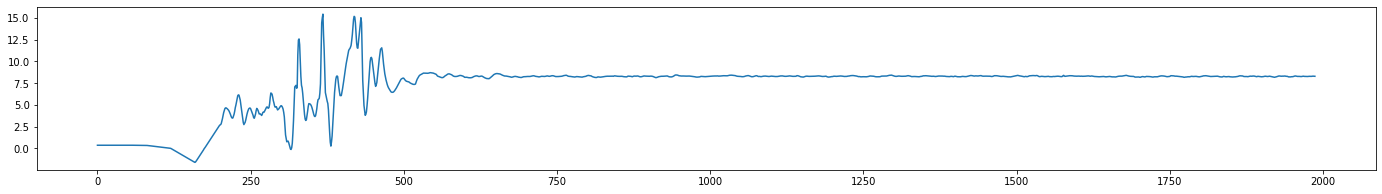

SDL data :- 


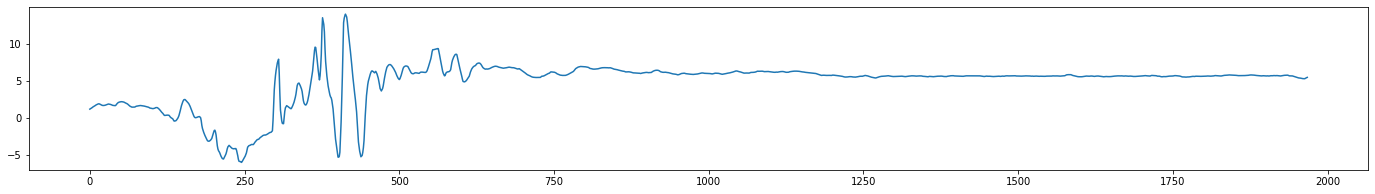

In [37]:
# Visualizing acc_x of falls

print('FOL data :- ')
data = np.array(pd.read_csv('/mobiact/MobiAct_Dataset_v2.0/Annotated Data/FOL/FOL_14_3_annotated.csv')['acc_x'])
plt.figure(figsize = (24,3))
plt.plot(data)
plt.show()

print('FKL data :- ')
data = np.array(pd.read_csv('/mobiact/MobiAct_Dataset_v2.0/Annotated Data/FKL/FKL_12_3_annotated.csv')['acc_x'])
plt.figure(figsize = (24,3))
plt.plot(data)
plt.show()

print('BSC data :- ')
data = np.array(pd.read_csv('/mobiact/MobiAct_Dataset_v2.0/Annotated Data/BSC/BSC_12_3_annotated.csv')['acc_x'])
plt.figure(figsize = (24,3))
plt.plot(data)
plt.show()

print('SDL data :- ')
data = np.array(pd.read_csv('/mobiact/MobiAct_Dataset_v2.0/Annotated Data/SDL/SDL_11_1_annotated.csv')['acc_x'])
plt.figure(figsize = (24,3))
plt.plot(data)
plt.show()

reading from  /kaggle/input/mobiact/MobiAct_Dataset_v2.0/Annotated Data/FOL

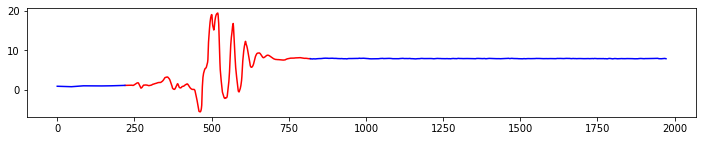

Time taken :-  1.7940175533294678
reading from  /kaggle/input/mobiact/MobiAct_Dataset_v2.0/Annotated Data/SDL

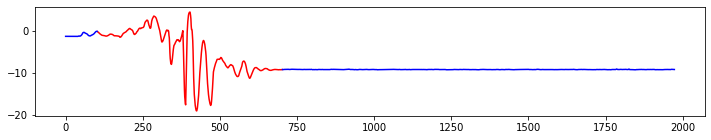

Time taken :-  1.7937638759613037
reading from  /kaggle/input/mobiact/MobiAct_Dataset_v2.0/Annotated Data/FKL

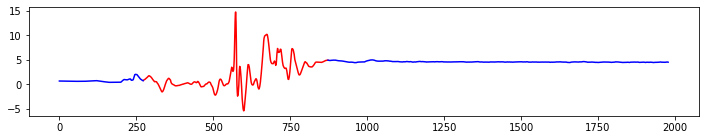

Time taken :-  1.9536874294281006
reading from  /kaggle/input/mobiact/MobiAct_Dataset_v2.0/Annotated Data/BSC

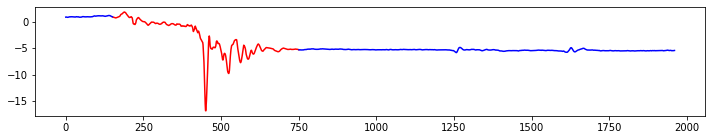

Time taken :-  2.542926073074341
Time taken ==  8.084394931793213


In [38]:
# We extract using standard deviation

# Last visualization represents data before and after fall event extraction

total_time = 0

for folder in os.listdir('/mobiact/MobiAct_Dataset_v2.0/Annotated Data'):
    if folder not in fall_types : continue
    t1 = time.time()
    
    visualize = 1
    
    path = '/mobiact/MobiAct_Dataset_v2.0/Annotated Data/' + folder
    print('reading from ',path,end = '')
    for person in person_numlist:
        for trial in trials:
            try :
                data = pd.read_csv(path + '/' + folder + '_' + str(person) + '_' + str(trial) + '_' + 'annotated.csv')

                acc_x = np.array(data['acc_x']).reshape((len(data),1))
                acc_y = np.array(data['acc_y']).reshape((len(data),1))
                acc_z = np.array(data['acc_z']).reshape((len(data),1))
                gyro_x = np.array(data['gyro_x']).reshape((len(data),1))
                gyro_y = np.array(data['gyro_y']).reshape((len(data),1))
                gyro_z = np.array(data['gyro_z']).reshape((len(data),1))

                data = np.concatenate([acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z],axis = -1)

                acc_x_sd = ((acc_x - np.sum(acc_x)/len(acc_x))**2)
                at = min(len(acc_x)-300,max(300,np.argmax(acc_x_sd)))
                if(len(acc_x) < 600) : continue
                
                # Trying to increase data points in fall dataset upto before 
                # if visualize == 1: ...
                
                at -= 100
                if at-300 >= 0 and at+300 <= len(acc_x):
                    xtrain.append(data[at-300:at+300])
                    ytrain.append(1)
                    
                at += 200
                if at-300 >= 0 and at+300 <= len(acc_x):
                    xtrain.append(data[at-300:at+300])
                    ytrain.append(1)
                
                at -= 100
                if at-300 >= 0 and at+300 <= len(acc_x):
                    xtrain.append(data[at-300:at+300])
                    ytrain.append(1)
                
                if visualize == 1:
                    plt.figure(figsize = (12,2))
                    plt.plot(np.arange(at-300,at+300),acc_x[at-300:at+300],color = 'red')
                    plt.plot(np.arange(0,at-300),acc_x[0:at-300],color = 'blue')
                    plt.plot(np.arange(at+300,len(acc_x)),acc_x[at+300:],color = 'blue')
                    plt.show()
                    visualize = 0
                    print('==============================================================')
            except : continue

    t2 = time.time()
    total_time += t2 - t1
    print('Time taken :- ' , t2 - t1)
    plt.show()
print('Time taken == ',total_time)

xtrain = np.array(xtrain)
ytrain = np.array(ytrain)

In [39]:
xtrain.shape,ytrain.shape

((8091, 600, 6), (8091,))

In [40]:
ytrain1 = []
for i in ytrain:
    ytrain1.append([0]*2)
    ytrain1[-1][i] = 1
ytrain = np.array(ytrain1)

In [41]:
xtrain,xtest,ytrain,ytest = train_test_split(xtrain,ytrain,train_size = 0.7)
xtest,xval,ytest,yval = train_test_split(xtest,ytest,train_size = 0.5)

In [42]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape,xval.shape,yval.shape

((5663, 600, 6),
 (5663, 2),
 (1214, 600, 6),
 (1214, 2),
 (1214, 600, 6),
 (1214, 2))

In [43]:
# Min-max normalization xtrain ,xval and xtest data

for i in range(6):
    min_ = min([min(j) for j in xtrain[:,:,i]])
    max_ = max([max(j) for j in xtrain[:,:,i]])
    
    xtrain[:,:,i] = 2*(xtrain[:,:,i]-min_)/(max_-min_)-1
    
for i in range(6):
    min_ = min([min(j) for j in xtest[:,:,i]])
    max_ = max([max(j) for j in xtest[:,:,i]])
    
    xtest[:,:,i] = 2*(xtest[:,:,i]-min_)/(max_-min_)-1
    
for i in range(6):
    min_ = min([min(j) for j in xval[:,:,i]])
    max_ = max([max(j) for j in xval[:,:,i]])
    
    xval[:,:,i] = 2*(xval[:,:,i]-min_)/(max_-min_)-1

In [44]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape,xval.shape,yval.shape

((5663, 600, 6),
 (5663, 2),
 (1214, 600, 6),
 (1214, 2),
 (1214, 600, 6),
 (1214, 2))

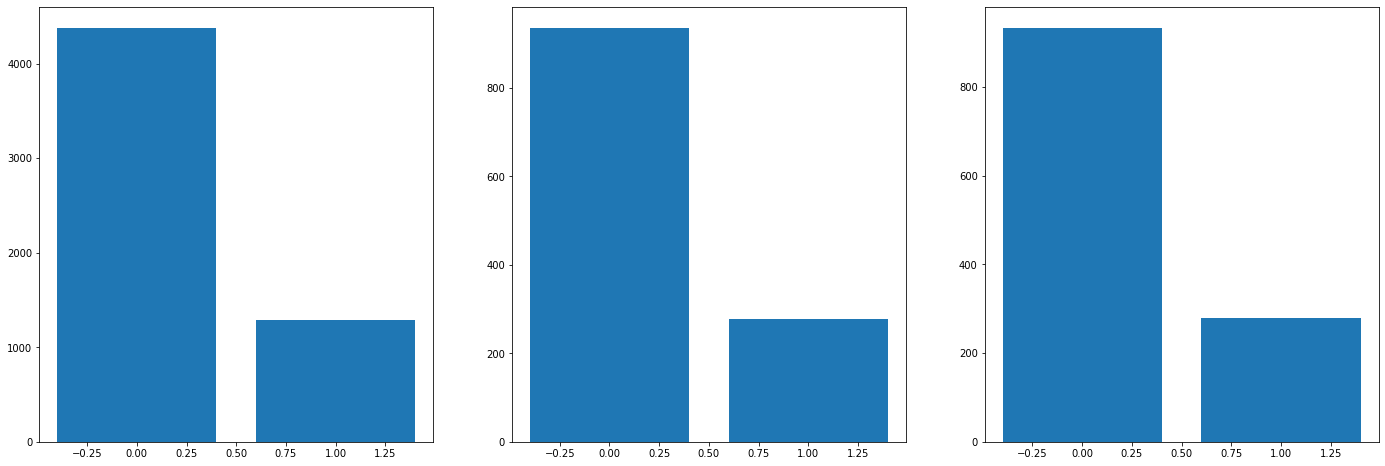

In [45]:
plt.figure(figsize = (24,8))
plt.subplot(1,3,1)
plt.bar(np.arange(0,2),sum(ytrain))

plt.subplot(1,3,2)
plt.bar(np.arange(0,2),sum(ytest))

plt.subplot(1,3,3)
plt.bar(np.arange(0,2),sum(yval))
plt.show()

In [55]:
def build_cnn(input_shape,number_of_activities,seq=0):
    input_layer = keras.Input(shape = input_shape,name = 'title_'+str(seq))
    
    cnn = layers.Conv1D(24,2,1,"same",name = 'Conv1D_'+str(seq)+'_1')(input_layer)
    cnn = layers.LayerNormalization(name = 'layernorm_'+str(seq)+'_1')(cnn)
    
    cnn = layers.Conv1D(144,2,1,"same",name = 'Conv1D_2'+str(seq)+'_1')(cnn)
    cnn = layers.LayerNormalization(name = 'layernorm_2'+str(seq)+'_1')(cnn)
    cnn = layers.MaxPool1D(2)(cnn)
    
    cnn = layers.Conv1D(288,2,1,"same",name = 'Conv1D_5'+str(seq)+'_1')(cnn)
    cnn = layers.LayerNormalization(name = 'layernorm_5'+str(seq)+'_1')(cnn)
    cnn = layers.MaxPool1D(2)(cnn)
    
    cnn = layers.Conv1D(144,2,1,"same",name = 'Conv1D_6'+str(seq)+'_1')(cnn)
    cnn = layers.LayerNormalization(name = 'layernorm_6'+str(seq)+'_1')(cnn)
    cnn = layers.MaxPool1D(2)(cnn)
        
    cnn = layers.Flatten()(cnn)
    
    cnn = layers.Dense(144,activation='relu',name = 'dense_1')(cnn)
    cnn = layers.Dense(72,activation='relu',name = 'dense_2')(cnn)
    cnn = layers.Dense(24,activation='relu',name = 'dense_3')(cnn)
    cnn = layers.Dense(number_of_activities,activation='softmax',name = 'dense_4')(cnn)
    
    return keras.Model(input_layer,cnn,name = 'model')

In [56]:
cnn = build_cnn(xtrain.shape[1:],2)

In [57]:
cnn.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
title_0 (InputLayer)         [(None, 600, 6)]          0         
_________________________________________________________________
Conv1D_0_1 (Conv1D)          (None, 600, 24)           312       
_________________________________________________________________
layernorm_0_1 (LayerNormaliz (None, 600, 24)           48        
_________________________________________________________________
Conv1D_20_1 (Conv1D)         (None, 600, 144)          7056      
_________________________________________________________________
layernorm_20_1 (LayerNormali (None, 600, 144)          288       
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 300, 144)          0         
_________________________________________________________________
Conv1D_50_1 (Conv1D)         (None, 300, 288)          83232 

In [58]:
# Training cnn
cnn.compile(loss = 'categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
cnn_history_1 = cnn.fit(
    xtrain,
    ytrain,
    epochs = 5,
    validation_data = (
        xval,
        yval
    ),
    batch_size = 200,
)

Epoch 1/5
29/29 [==============================] - 4s 100ms/step - loss: 0.1438 - accuracy: 0.9590 - val_loss: 0.0131 - val_accuracy: 0.9967
Epoch 2/5
29/29 [==============================] - 2s 80ms/step - loss: 0.0279 - accuracy: 0.9940 - val_loss: 0.0172 - val_accuracy: 0.9967
Epoch 3/5
29/29 [==============================] - 2s 81ms/step - loss: 0.0151 - accuracy: 0.9959 - val_loss: 0.0561 - val_accuracy: 0.9901
Epoch 4/5
29/29 [==============================] - 2s 80ms/step - loss: 0.0118 - accuracy: 0.9965 - val_loss: 0.0209 - val_accuracy: 0.9951
Epoch 5/5
29/29 [==============================] - 2s 80ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0239 - val_accuracy: 0.9967


In [59]:
ypred = cnn.predict(xtest)
ytemp = []
for i in ypred:
    pred = [0]*2
    pred[np.argmax(i)] = 1
    ytemp.append(pred)
ypred = np.array(ytemp)

In [78]:
# Testing accuracy

cnt = 0
for i in range(len(ypred)):
    if (ypred[i] == ytest[i]).all() : cnt += 1
        
print('test accuracy = ',cnt / len(ypred) * 100)

test accuracy =  99.835255354201


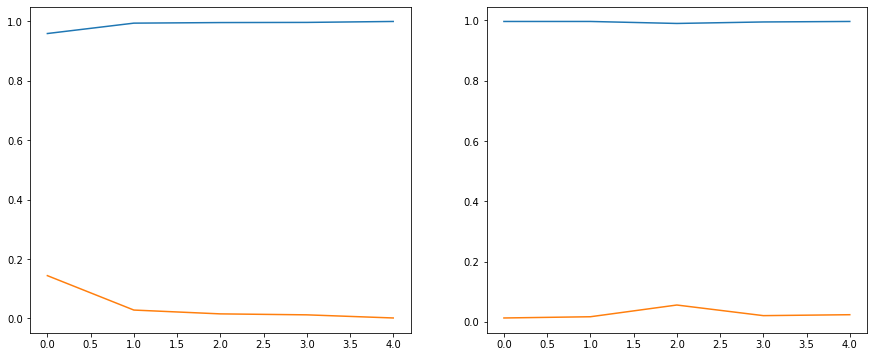

In [60]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.plot(cnn_history_1.history['accuracy'])
plt.plot(cnn_history_1.history['loss'])
plt.subplot(1,2,2)
plt.plot(cnn_history_1.history['val_accuracy'])
plt.plot(cnn_history_1.history['val_loss'])
plt.show()

In [61]:
test_cm = confusion_matrix(ytest.argmax(axis = 1),ypred.argmax(axis = 1))

<AxesSubplot:>

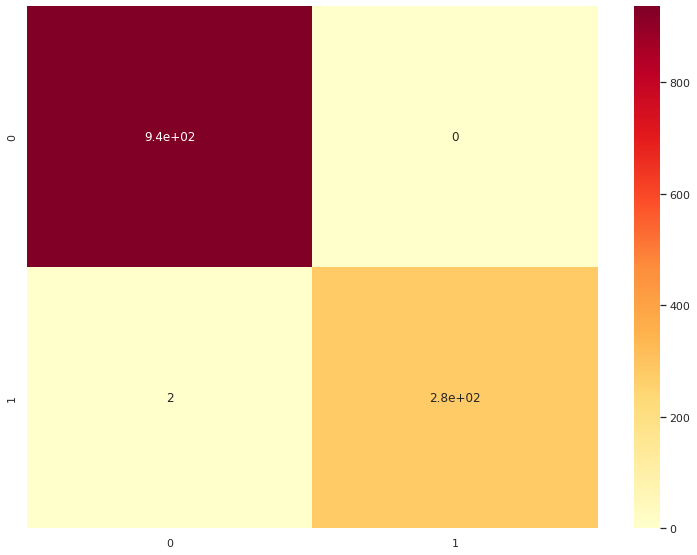

In [62]:
sb.set(rc = {'figure.figsize':(12.8,9.6)})
sb.heatmap(test_cm,annot = True, cmap = 'YlOrRd')

In [63]:
print(sklearn.metrics.classification_report(ytest.argmax(axis = 1),ypred.argmax(axis = 1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       936
           1       1.00      0.99      1.00       278

    accuracy                           1.00      1214
   macro avg       1.00      1.00      1.00      1214
weighted avg       1.00      1.00      1.00      1214



In [89]:
def build_lstm(input_shape,number_of_activities):
    input_layer = keras.Input(shape = input_shape,name = 'title_')
    
    lstm = layers.LSTM(36,return_sequences = True,name = 'lstm_0')(input_layer)
    lstm = layers.LayerNormalization()(lstm)
    lstm = layers.LSTM(64,return_sequences = True,name = 'lstm_1')(lstm)
    lstm = layers.LayerNormalization()(lstm)
    lstm = layers.LSTM(128,return_sequences = True,name = 'lstm_2')(lstm)
    lstm = layers.LayerNormalization()(lstm)
    lstm = layers.LSTM(64,name = 'lstm_5')(lstm)
    lstm = layers.LayerNormalization()(lstm)
    lstm = layers.Dense(32,name = 'dense_1')(lstm)
    lstm = layers.Dense(number_of_activities,name = 'dense_2',activation = 'sigmoid')(lstm)
    
    return keras.Model(input_layer,lstm)

In [90]:
lstm = build_lstm(xtrain.shape[1:],2)

In [91]:
lstm.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
title_ (InputLayer)          [(None, 600, 6)]          0         
_________________________________________________________________
lstm_0 (LSTM)                (None, 600, 36)           6192      
_________________________________________________________________
layer_normalization_12 (Laye (None, 600, 36)           72        
_________________________________________________________________
lstm_1 (LSTM)                (None, 600, 64)           25856     
_________________________________________________________________
layer_normalization_13 (Laye (None, 600, 64)           128       
_________________________________________________________________
lstm_2 (LSTM)                (None, 600, 128)          98816     
_________________________________________________________________
layer_normalization_14 (Laye (None, 600, 128)          256 

In [92]:
lstm.compile(loss = 'categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
lstm_history = lstm.fit(
    xtrain,
    ytrain,
    validation_data = (
        xtest,
        ytest
    ),
    epochs = 5,
    batch_size = 200,
)

Epoch 1/5
29/29 [==============================] - 11s 213ms/step - loss: 0.1576 - accuracy: 0.9371 - val_loss: 0.0922 - val_accuracy: 0.9728
Epoch 2/5
29/29 [==============================] - 5s 170ms/step - loss: 0.0935 - accuracy: 0.9633 - val_loss: 0.0853 - val_accuracy: 0.9679
Epoch 3/5
29/29 [==============================] - 5s 173ms/step - loss: 0.0870 - accuracy: 0.9659 - val_loss: 0.0838 - val_accuracy: 0.9671
Epoch 4/5
29/29 [==============================] - 5s 171ms/step - loss: 0.0839 - accuracy: 0.9649 - val_loss: 0.0787 - val_accuracy: 0.9687
Epoch 5/5
29/29 [==============================] - 5s 175ms/step - loss: 0.0811 - accuracy: 0.9680 - val_loss: 0.0897 - val_accuracy: 0.9703


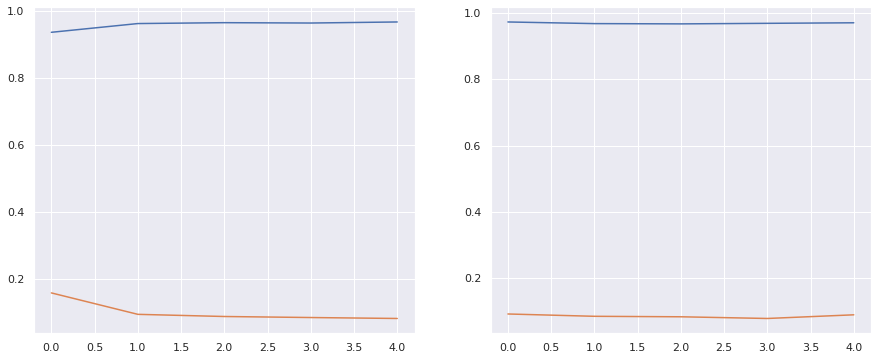

In [93]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['loss'])
plt.subplot(1,2,2)
plt.plot(lstm_history.history['val_accuracy'])
plt.plot(lstm_history.history['val_loss'])
plt.show()

In [94]:
ypred = lstm.predict(xtest)
ytemp = []
for i in ypred:
    pred = [0]*2
    pred[np.argmax(i)] = 1
    ytemp.append(pred)
ypred = np.array(ytemp)

In [95]:
# Testing accuracy

cnt = 0
for i in range(len(ypred)):
    if (ypred[i] == ytest[i]).all() : cnt += 1
        
print('test accuracy = ',cnt / len(ypred) * 100)

test accuracy =  97.03459637561778


In [96]:
test_cm = confusion_matrix(ytest.argmax(axis = 1),ypred.argmax(axis = 1))

<AxesSubplot:>

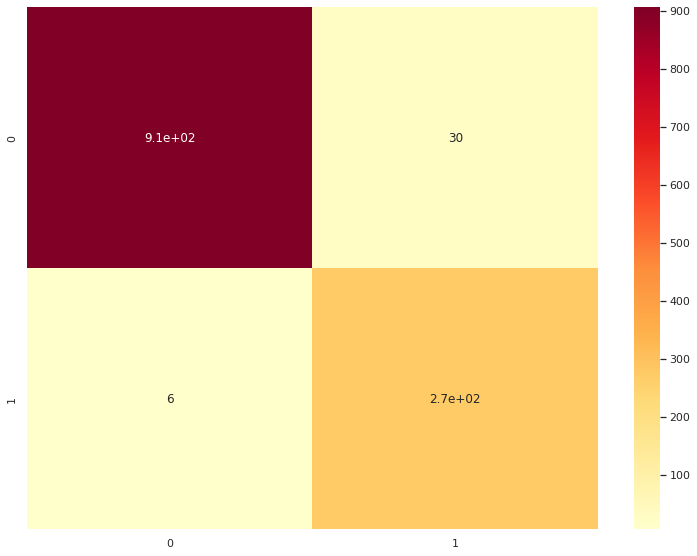

In [97]:
sb.set(rc = {'figure.figsize':(12.8,9.6)})
sb.heatmap(test_cm,annot = True, cmap = 'YlOrRd')

In [98]:
print(sklearn.metrics.classification_report(ytest.argmax(axis = 1),ypred.argmax(axis = 1)))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       936
           1       0.90      0.98      0.94       278

    accuracy                           0.97      1214
   macro avg       0.95      0.97      0.96      1214
weighted avg       0.97      0.97      0.97      1214



# Bi-LSTM

In [99]:
def build_lstm(input_shape,number_of_activities):
    input_layer = keras.Input(shape = input_shape,name = 'title_')
    
    lstm = layers.Bidirectional(layers.LSTM(36,return_sequences = True,name = 'lstm_0'))(input_layer)
    lstm = layers.LayerNormalization()(lstm)
    lstm = layers.Bidirectional(layers.LSTM(64,return_sequences = True,name = 'lstm_1'))(lstm)
    lstm = layers.LayerNormalization()(lstm)
    lstm = layers.Dropout(rate = 0.25)(lstm)
    lstm = layers.Bidirectional(layers.LSTM(128,return_sequences = True,name = 'lstm_2'))(lstm)
    lstm = layers.LayerNormalization()(lstm)
    lstm = layers.Bidirectional(layers.LSTM(64,name = 'lstm_5'))(lstm)
    lstm = layers.LayerNormalization()(lstm)
    lstm = layers.Dropout(rate = 0.25)(lstm)
    lstm = layers.Dense(32,name = 'dense_1')(lstm)
    lstm = layers.Dense(number_of_activities,name = 'dense_2',activation = 'softmax')(lstm)
    
    return keras.Model(input_layer,lstm)

In [100]:
bilstm = build_lstm(xtrain.shape[1:],2)

In [101]:
bilstm.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
title_ (InputLayer)          [(None, 600, 6)]          0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 600, 72)           12384     
_________________________________________________________________
layer_normalization_16 (Laye (None, 600, 72)           144       
_________________________________________________________________
bidirectional_5 (Bidirection (None, 600, 128)          70144     
_________________________________________________________________
layer_normalization_17 (Laye (None, 600, 128)          256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 600, 128)          0         
_________________________________________________________________
bidirectional_6 (Bidirection (None, 600, 256)          2631

In [102]:
bilstm.compile(loss = 'categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
bilstm_history = bilstm.fit(
    xtrain,
    ytrain,
    validation_data = (
        xval,
        yval
    ),
    epochs = 5,
    batch_size = 200,
)

Epoch 1/5
29/29 [==============================] - 23s 475ms/step - loss: 0.1241 - accuracy: 0.9555 - val_loss: 0.0331 - val_accuracy: 0.9934
Epoch 2/5
29/29 [==============================] - 11s 375ms/step - loss: 0.0395 - accuracy: 0.9892 - val_loss: 0.0232 - val_accuracy: 0.9959
Epoch 3/5
29/29 [==============================] - 11s 379ms/step - loss: 0.0263 - accuracy: 0.9926 - val_loss: 0.0226 - val_accuracy: 0.9926
Epoch 4/5
29/29 [==============================] - 11s 378ms/step - loss: 0.0223 - accuracy: 0.9935 - val_loss: 0.0200 - val_accuracy: 0.9959
Epoch 5/5
29/29 [==============================] - 11s 373ms/step - loss: 0.0148 - accuracy: 0.9959 - val_loss: 0.0182 - val_accuracy: 0.9959


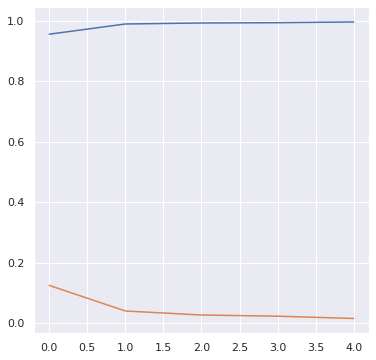

In [103]:
plt.figure(figsize = (6,6))
plt.plot(bilstm_history.history['accuracy'])
plt.plot(bilstm_history.history['loss'])
plt.show()

In [104]:
ypred = bilstm.predict(xtest)
ytemp = []
for i in ypred:
    pred = [0]*2
    pred[np.argmax(i)] = 1
    ytemp.append(pred)
ypred = np.array(ytemp)

In [105]:
# Testing accuracy

cnt = 0
for i in range(len(ypred)):
    if (ypred[i] == ytest[i]).all() : cnt += 1
        
print('test accuracy = ',cnt / len(ypred) * 100)

test accuracy =  99.67051070840198


In [106]:
test_cm = confusion_matrix(ytest.argmax(axis = 1),ypred.argmax(axis = 1))

<AxesSubplot:>

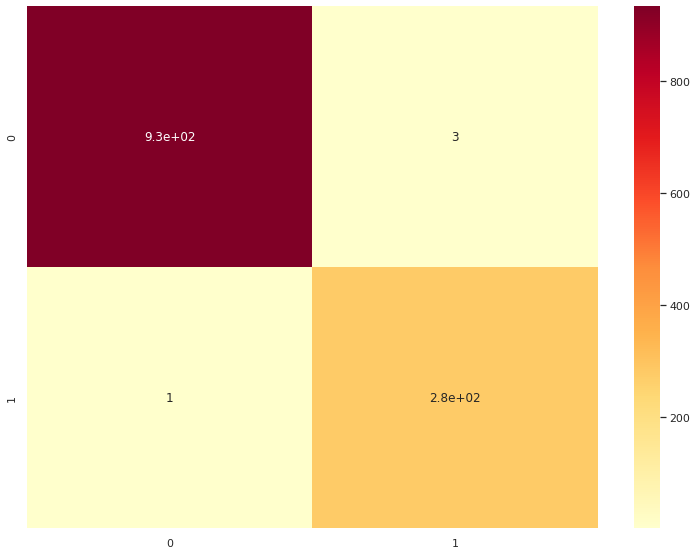

In [107]:
sb.set(rc = {'figure.figsize':(12.8,9.6)})
sb.heatmap(test_cm,annot = True, cmap = 'YlOrRd')

In [108]:
print(sklearn.metrics.classification_report(ytest.argmax(axis = 1),ypred.argmax(axis = 1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       936
           1       0.99      1.00      0.99       278

    accuracy                           1.00      1214
   macro avg       0.99      1.00      1.00      1214
weighted avg       1.00      1.00      1.00      1214



# CNN + LSTM

In [109]:
def build_conv_lstm(input_shape,number_of_activities):
    input_layer = keras.Input(shape = input_shape,name = 'title_')
    
    cnn = layers.Conv1D(24,2,1,"same",name = 'Conv1D_'+'_1')(input_layer)
    cnn = layers.LayerNormalization(name = 'layernorm_'+'_1')(cnn)
    
    cnn = layers.Conv1D(144,2,1,"same",name = 'Conv1D_2'+'_1')(cnn)
    cnn = layers.LayerNormalization(name = 'layernorm_2'+'_1')(cnn)
    cnn = layers.MaxPool1D(2)(cnn)

    cnn = layers.Conv1D(288,2,1,"same",name = 'Conv1D_3'+'_1')(cnn)
    cnn = layers.LayerNormalization(name = 'layernorm_3'+'_1')(cnn)
    cnn = layers.MaxPool1D(2)(cnn)

    cnn = layers.Conv1D(144,2,1,"same",name = 'Conv1D_6'+'_1')(cnn)
    cnn = layers.LayerNormalization(name = 'layernorm_6'+'_1')(cnn)
    cnn = layers.MaxPool1D(2)(cnn)
        
    lstm = layers.LSTM(64,return_sequences = True,name = 'lstm_0')(cnn)
    lstm = layers.Dropout(rate = 0.5)(lstm)
    lstm = layers.LSTM(64,name = 'lstm_1')(lstm)
    lstm = layers.Dropout(rate = 0.5)(lstm)
    
    lstm = layers.Dense(64,name = 'dense_1')(lstm)
    lstm = layers.Dense(number_of_activities,name = 'dense_2',activation = 'softmax')(lstm)
    
    return keras.Model(input_layer,lstm)

In [112]:
conv_lstm = build_conv_lstm(xtrain.shape[1:],ytrain.shape[1])

In [113]:
conv_lstm.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
title_ (InputLayer)          [(None, 600, 6)]          0         
_________________________________________________________________
Conv1D__1 (Conv1D)           (None, 600, 24)           312       
_________________________________________________________________
layernorm__1 (LayerNormaliza (None, 600, 24)           48        
_________________________________________________________________
Conv1D_2_1 (Conv1D)          (None, 600, 144)          7056      
_________________________________________________________________
layernorm_2_1 (LayerNormaliz (None, 600, 144)          288       
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 300, 144)          0         
_________________________________________________________________
Conv1D_3_1 (Conv1D)          (None, 300, 288)          8323

In [117]:
conv_lstm.compile(loss = 'categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
conv_lstm_history = conv_lstm.fit(
    xtrain,
    ytrain,
    validation_data = (
        xval,
        yval
    ),
    epochs = 5,
    batch_size = 200,
)

Epoch 1/5
29/29 [==============================] - 7s 129ms/step - loss: 0.0468 - accuracy: 0.9838 - val_loss: 0.0435 - val_accuracy: 0.9876
Epoch 2/5
29/29 [==============================] - 3s 92ms/step - loss: 0.0328 - accuracy: 0.9898 - val_loss: 0.0284 - val_accuracy: 0.9909
Epoch 3/5
29/29 [==============================] - 3s 95ms/step - loss: 0.0238 - accuracy: 0.9933 - val_loss: 0.0243 - val_accuracy: 0.9918
Epoch 4/5
29/29 [==============================] - 3s 93ms/step - loss: 0.0256 - accuracy: 0.9931 - val_loss: 0.0314 - val_accuracy: 0.9918
Epoch 5/5
29/29 [==============================] - 3s 94ms/step - loss: 0.0316 - accuracy: 0.9915 - val_loss: 0.0189 - val_accuracy: 0.9951


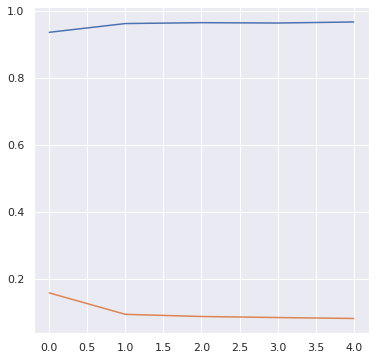

In [118]:
plt.figure(figsize = (6,6))
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['loss'])
plt.show()

In [121]:
ypred = conv_lstm.predict(xtest)
ytemp = []
for i in ypred:
    pred = [0]*(ytrain.shape[1])
    pred[np.argmax(i)] = 1
    ytemp.append(pred)
ypred = np.array(ytemp)

In [122]:
# Testing accuracy

cnt = 0
for i in range(len(ypred)):
    if (ypred[i] == ytest[i]).all() : cnt += 1
        
print('test accuracy = ',cnt / len(ypred) * 100)

test accuracy =  99.25864909390445


<AxesSubplot:>

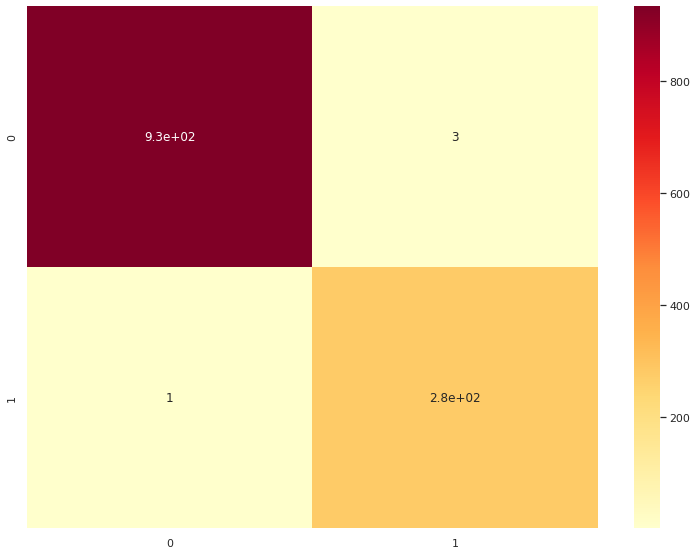

In [124]:
sb.set(rc = {'figure.figsize':(12.8,9.6)})
sb.heatmap(test_cm,annot = True, cmap = 'YlOrRd')

In [125]:
print(sklearn.metrics.classification_report(ytest.argmax(axis = 1),ypred.argmax(axis = 1)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       936
           1       1.00      0.97      0.98       278

    accuracy                           0.99      1214
   macro avg       1.00      0.98      0.99      1214
weighted avg       0.99      0.99      0.99      1214

